In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [148]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [149]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [151]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [153]:
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [186]:
df = df.sample(frac=1)
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
54,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,7,14.59
242,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56,31.35
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28,37.43
783,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,90,29.39
709,173.0,116.0,0.0,192.0,0.0,946.8,856.8,90,32.10
...,...,...,...,...,...,...,...,...,...
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69
438,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28,41.41
67,332.5,142.5,0.0,228.0,0.0,932.0,594.0,7,30.28
1000,141.9,166.6,129.7,173.5,10.9,882.6,785.3,28,44.61


In [159]:
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
365,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,14,38.60
481,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,61.07
302,290.4,0.0,96.2,168.1,9.4,961.2,865.0,56,45.08
395,200.0,200.0,0.0,190.0,0.0,1145.0,660.0,28,49.25
573,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,38.70


In [160]:
train_data.shape

(721, 9)

In [161]:
test_data = df.iloc[721:,:]
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
520,284.0,15.0,141.0,179.0,5.5,842.0,801.0,3,13.40
157,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3,21.78
300,290.4,0.0,96.2,168.1,9.4,961.2,865.0,14,34.67


In [162]:
test_data.shape

(309, 9)

In [163]:
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [164]:
train_labels.head()

365    38.60
481    61.07
302    45.08
395    49.25
573    38.70
Name: Concrete_Strength, dtype: float64

In [165]:
test_labels.head()

9      39.29
520    13.40
157    77.30
324    21.78
300    34.67
Name: Concrete_Strength, dtype: float64

In [166]:
train_mean = np.mean(train_data, axis = 0)
train_std = np.std(train_data, axis = 0)
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [167]:
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
365,-0.620767,-0.225004,1.027835,-1.224497,0.605586,0.500049,0.091290,-0.512837
481,1.639767,-0.565628,0.365751,-0.919487,0.951033,-0.114047,-0.784645,0.158429
302,0.117746,-0.839955,0.631202,-0.628774,0.571041,-0.189348,1.168971,0.158429
395,-0.766513,1.446107,-0.853470,0.414934,-1.052559,2.196926,-1.448619,-0.289082
573,0.369134,1.568411,-0.853470,0.210005,-1.052559,0.015783,-1.074495,-0.289082


In [168]:
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
9,1.923434,-0.839955,-0.853470,2.225934,-1.052559,-0.568452,-2.291355,-0.289082
520,0.055143,-0.668500,1.322609,-0.109302,-0.102580,-1.736921,0.351772,-0.688645
157,0.823979,1.320374,-0.853470,-0.781279,0.951033,-0.403568,-0.225374,0.158429
324,-0.254934,-0.839955,0.671328,-1.667716,1.400114,0.155999,1.475420,-0.688645
300,0.117746,-0.839955,0.631202,-0.628774,0.571041,-0.189348,1.168971,-0.512837


In [169]:
model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 7         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = model.fit(train_data, train_labels, epochs=100, validation_split= 0.2)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 1525.9011 - mse: 1525.9011 - mae: 35.2895 - val_loss: 1704.6892 - val_mse: 1704.6892 - val_mae: 37.3674
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 1466.9642 - mse: 1466.9642 - mae: 34.7083 - val_loss: 1690.6383 - val_mse: 1690.6383 - val_mae: 37.1799
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 1453.0164 - mse: 1453.0164 - mae: 34.5503 - val_loss: 1674.6292 - val_mse: 1674.6292 - val_mae: 36.9661
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1403.6677 - mse: 1403.6677 - mae: 33.5688 - val_loss: 1656.4122 - val_mse: 1656.4122 - val_mae: 36.7233
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1423.4229 - mse: 1423.4229 - mae: 33.9807 - val_loss: 1637.7954 - val_mse: 1637.7954 - val_mae: 36.4725
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1338.5190 - mse: 1338.5190 - mae: 33.1075

In [171]:
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.head()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
0,1458.623169,1458.623169,34.474976,1704.689209,1704.689209,37.367409,0
1,1445.795166,1445.795166,34.291451,1690.638306,1690.638306,37.179935,1
2,1432.206055,1432.206055,34.093689,1674.629150,1674.629150,36.966122,2
3,1416.566162,1416.566162,33.869453,1656.412231,1656.412231,36.723301,3
4,1399.730591,1399.730591,33.620644,1637.795410,1637.795410,36.472530,4


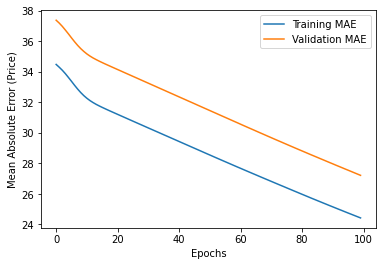

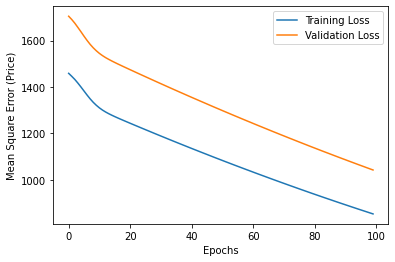

In [187]:
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [173]:
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [174]:
test_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 890.8317 - mse: 890.8317 - mae: 25.0819


In [175]:
print(f"Loss: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Loss: 890.8317260742188
Mean Absolute Error: 890.8317260742188


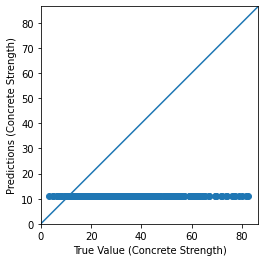

In [188]:
plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [177]:
from tensorflow.keras.models import Sequential
model2 = Sequential()
 #model2.add(Dense(10, activation='relu', input_shape = (15,)))
 #model2.add(Dense(8, activation='relu'))
 #model2.add(Dense(6, activation='relu'))
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [178]:
history_1 = model2.fit(train_data, train_labels, epochs=300, validation_split=0.2)

Epoch 1/300
18/18 [==============================] - 1s 14ms/step - loss: 1447.7401 - mse: 1447.7401 - mae: 34.3850 - val_loss: 1302.0272 - val_mse: 1302.0272 - val_mae: 31.5759
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 933.7447 - mse: 933.7447 - mae: 25.9739 - val_loss: 647.3281 - val_mse: 647.3281 - val_mae: 20.0977
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 425.3197 - mse: 425.3197 - mae: 16.1474 - val_loss: 323.4795 - val_mse: 323.4795 - val_mae: 14.2912
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 235.1210 - mse: 235.1210 - mae: 12.4230 - val_loss: 253.4932 - val_mse: 253.4932 - val_mae: 12.9772
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 191.1545 - mse: 191.1545 - mae: 11.2307 - val_loss: 228.8884 - val_mse: 228.8884 - val_mae: 12.2557
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 190.2663 - mse: 190.2663 - mae: 11.3856 - val_loss: 216.5

In [179]:
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
295,8.730352,8.730352,2.200801,31.431046,31.431046,4.147017,295
296,9.374943,9.374943,2.254760,27.663450,27.663450,3.650950,296
297,9.897846,9.897846,2.304666,33.907730,33.907730,4.312042,297
298,9.022134,9.022134,2.242600,29.585560,29.585560,3.813883,298
299,9.226381,9.226381,2.288117,28.278944,28.278944,3.718156,299


In [180]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [181]:
predictions1.shape

(309,)

In [182]:
test1_score = model2.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 39.3912 - mse: 39.3912 - mae: 4.3088


In [183]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 39.391170501708984
Mean Absolute Error: 4.308815002441406


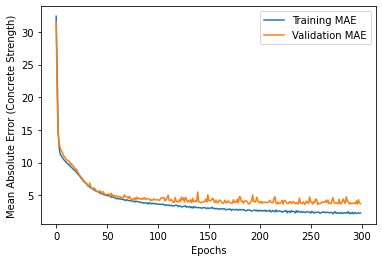

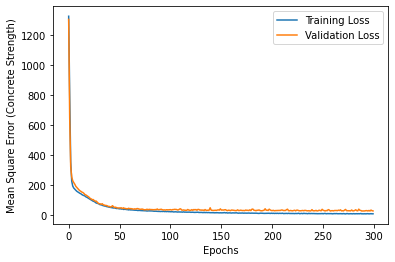

In [189]:
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

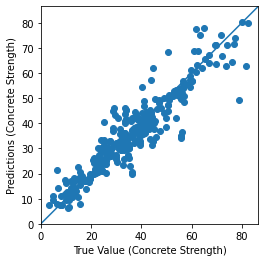

In [190]:
plt.scatter(test_labels, predictions1)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])